In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
mydata = pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
mydata.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [4]:
#checking for null values
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


# Converting to liters
 According to the original sourse of data: 
* beer serving is 12-ounce can(350ml), 
* wine serving is standart glass of wine(150ml), 
* spirit serving is 1.5 fluid ounce(44,36ml)

In [5]:
beer = lambda alc: round(alc * 350 / 1000, 1)
spirit = lambda alc: round(alc * 44.36 / 1000, 1)
wine = lambda alc: round(alc * 150 / 1000, 1)  

mydata['beer_servings'] = mydata.beer_servings.apply(beer)
mydata['spirit_servings'] = mydata.spirit_servings.apply(spirit)
mydata['wine_servings'] = mydata.wine_servings.apply(wine)

In [6]:
mydata.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,31.1,5.9,8.1,4.9,Europe
2,Algeria,8.8,0.0,2.1,0.7,Africa
3,Andorra,85.8,6.1,46.8,12.4,Europe
4,Angola,76.0,2.5,6.8,5.9,Africa


# Adding a new column with rating in the world

In [7]:
numbers = mydata.loc[:,'total_litres_of_pure_alcohol'].drop_duplicates().sort_values(ascending=False).tolist()
numbers2 = np.arange(1,91)
mydict = dict(zip(numbers,numbers2))
mydata['place_in_world'] = mydata['total_litres_of_pure_alcohol'].map(mydict)

In [8]:
mydata.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,place_in_world
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,90
1,Albania,31.1,5.9,8.1,4.9,Europe,51
2,Algeria,8.8,0.0,2.1,0.7,Africa,83
3,Andorra,85.8,6.1,46.8,12.4,Europe,3
4,Angola,76.0,2.5,6.8,5.9,Africa,44


# Renaming columns

In [9]:
mydict2 = {'beer_servings':'beer_in_liters',
           'spirit_servings':'spirit_in_liters',
           'wine_servings':'wine_in_liters',
           'total_litres_of_pure_alcohol':'total_liters_of_pure_alcohol'}

mydata.rename(columns = mydict2,inplace=True)
mydata.columns = mydata.columns.map(str.capitalize)

In [10]:
mydata.head()

,Country,Beer_in_liters,Spirit_in_liters,Wine_in_liters,Total_liters_of_pure_alcohol,Continent,Place_in_world
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,90
1,Albania,31.1,5.9,8.1,4.9,Europe,51
2,Algeria,8.8,0.0,2.1,0.7,Africa,83
3,Andorra,85.8,6.1,46.8,12.4,Europe,3
4,Angola,76.0,2.5,6.8,5.9,Africa,44


# Setting new index

In [11]:
mydata.set_index(['Continent','Country'],inplace=True)
mydata.sort_index(inplace=True)

In [12]:
mydata.head()

Beer_in_liters  Spirit_in_liters  Wine_in_liters  \
Continent Country                                                          
Africa    Algeria                  8.8               0.0             2.1   
          Angola                  76.0               2.5             6.8   
          Benin                   11.9               0.2             1.9   
          Botswana                60.5               1.6             5.2   
          Burkina Faso             8.8               0.3             1.1   

                        Total_liters_of_pure_alcohol  Place_in_world  
Continent Country                                                     
Africa    Algeria                                0.7              83  
          Angola                                 5.9              44  
          Benin                                  1.1              79  
          Botswana                               5.4              49  
          Burkina Faso                           4.3              55

# Analysis
* Finding 10 first places in the world rating of alcohol consumption
* Finding the mean of alcohol consumption by continent
* Plotting the mean of alcohol consumption by continent

In [13]:
#Finding 10 first places in the world rating of alcohol consumption
mydata[mydata['Place_in_world']<11].sort_values(by='Place_in_world')

Beer_in_liters  Spirit_in_liters  \
Continent     Country                                                
Europe        Belarus                       49.7              16.5   
              Lithuania                    120.0              10.8   
              Andorra                       85.8               6.1   
North America Grenada                       69.7              19.4   
Europe        Czech Republic               126.3               7.5   
              France                        44.5               6.7   
Asia          Russian Federation            86.5              14.5   
Europe        Ireland                      109.5               5.2   
              Luxembourg                    82.6               5.9   
              Slovakia                      68.6              13.0   
              Germany                      121.1               5.2   
              Hungary                       81.9               9.5   
              Portugal                      67.9               3.0   
              Poland                       120.0               9.5   

                                  Wine_in_liters  \
Continent     Country                              
Europe        Belarus                        6.3   
              Lithuania                      8.4   
              Andorra                       46.8   
North America Grenada                        4.2   
Europe        Czech Republic                20.1   
              France                        55.5   
Asia          Russian Federation            10.9   
Europe        Ireland                       24.8   
              Luxembourg                    40.6   
              Slovakia                      17.4   
              Germany                       26.2   
              Hungary                       27.8   
              Portugal                      50.9   
              Poland                         8.4   

                                  Total_liters_of_pure_alcohol  Place_in_world  
Continent     Country                                                           
Europe        Belarus                                     14.4               1  
              Lithuania                                   12.9               2  
              Andorra                                     12.4               3  
North America Grenada                                     11.9               4  
Europe        Czech Republic                              11.8               5  
              France                                      11.8               5  
Asia          Russian Federation                          11.5               6  
Europe        Ireland                                     11.4               7  
              Luxembourg                                  11.4               7  
              Slovakia                                    11.4               7  
              Germany                                     11.3               8  
              Hungary                                     11.3               8  
              Portugal                                    11.0               9  
              Poland                                      10.9              10

In [18]:
#Finding the mean of alcohol consumption by continent
#First solution
def get_mean():
    total_mean = []
    continents = list(mydata.index.levels[0])
    for continent in continents:
        total_mean.append(mydata.loc[continent,'Total_liters_of_pure_alcohol'].mean())
    return total_mean

#sorting in descending order for the future plot
ser = pd.Series(continents,get_mean()).sort_index(ascending=False)

In [19]:
#Second solution
ser1 = mydata.groupby('Continent').Total_liters_of_pure_alcohol.mean().sort_values(ascending=False)

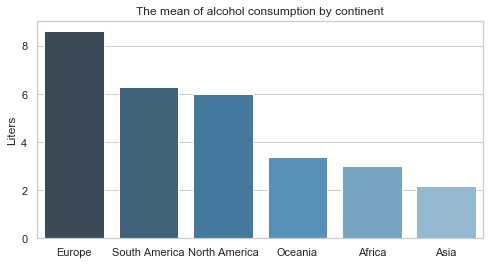

In [20]:
#Plotting the mean of alcohol consumption by continent
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
sns.barplot(x=ser.values,y=ser.index,palette="Blues_d").set_title('The mean of alcohol consumption by continent')
plt.ylabel("Liters")
plt.show()

# Program
* Provides information to the user about alcohol consumpsition on particular contintinent or country. 

In [21]:
def info_alc():
    continent = ''
    question = ''
    country = ''
    
    while not continent in list(mydata.index.levels[0]):
        continent = input('Hello,\nThis is a small rewier about alcohol consumption all'+ 
                    ' around the world. Please enter the name of the continent: ').title()

    while not (question == 'Yes' or question == 'No'):
        question = input('Do you want to see info about specific country?'+ 
                         ' Enter Yes or No: ').title()
    if question == 'No':
        df = mydata.loc[continent,:]
        return df
       
    else:
        while not (country in mydata.index.levels[1]): 
            country = input('Please enter the name of the country: ').title()
        a = country
        b = int(mydata.loc[(continent,country),'Place_in_world'])
        c = mydata.loc[(continent,country),'Beer_in_liters']
        d = mydata.loc[(continent,country),'Wine_in_liters']
        e = mydata.loc[(continent,country),'Spirit_in_liters']
        f = mydata.loc[(continent,country),'Total_liters_of_pure_alcohol']
        answer = ("{} takes the {} place in the world rating of alcohol consumption.\n"
              "One person drinks on average about {} liters of beer, {} liters of wine,\n"
              "{} liters of spirit per year.\nThe total consumption of pure alcohol " 
              "in one year is {} liters per person.")
        print('-------------------------------------------------------------------------')
        print(answer.format(a,b,c,d,e,f))

df = info_alc() 
df

Hello,
This is a small rewier about alcohol consumption all around the world. Please enter the name of the continent: asia
Do you want to see info about specific country? Enter Yes or No: yes
Please enter the name of the country: china
-------------------------------------------------------------------------
China takes the 50 place in the world rating of alcohol consumption.
One person drinks on average about 27.6 liters of beer, 1.2 liters of wine,
8.5 liters of spirit per year.
The total consumption of pure alcohol in one year is 5.0 liters per person.
